# Fordgobike-Tripdata-2017 Exploration
## BY JITU

## Preliminary Wrangling

> This dataset contains the trip data of the ford gobike


In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [32]:
#load dataset
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [33]:
df.shape

(519700, 13)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [35]:
df.duplicated().sum()

0

### Data Cleaning

In [36]:
# Change start_time and end_time to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [37]:
# change the data type for start_station_id,end_station_id,bike_id to be string
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')


In [38]:
# change the data type for user_type to be category
df['user_type'] = df['user_type'].astype('category')

In [39]:
df['duration_min'] = df['duration_sec']/60


In [40]:
# Extract dayofweek, hours information from the start_time
df['start_time_dayofweek']= df['start_time'].dt.strftime('%a')
df['start_time_hour']= df['start_time'].dt.hour

### TEST

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

### What is the structure of your dataset?

- Here I used Bay Wheels's trip data 
- Dataset contains 16 columns and 519700 rows
- colimns are: Trip Duration (seconds)
               Start Time and Date
               End Time and Date
               Start Station ID
               Start Station Name
               Start Station Latitude
               Start Station Longitude
               End Station ID
               End Station Name
               End Station Latitude
               End Station Longitude
               Bike ID
               User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### What is/are the main feature(s) of interest in your dataset?

> Trip diration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start station,End station,User_Type,Time

## Univariate Exploration



#### TRIP DISTRIBUTION

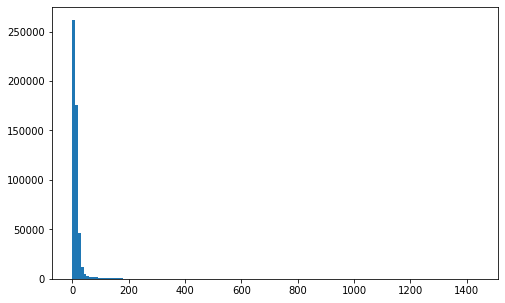

In [42]:
binsize = 10
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'duration_min', bins=bins);

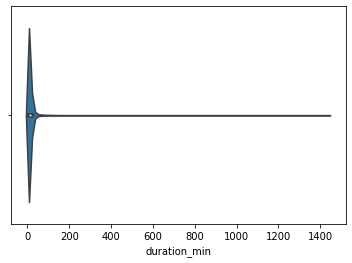

In [43]:
sb.violinplot(data = df, x = 'duration_min');

In [44]:
df['duration_min'].describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

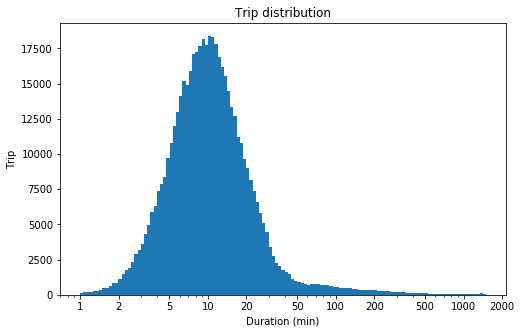

In [45]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)')
plt.title('Trip distribution')
plt.ylabel('Trip');

##### The distribution now looks closer to normal distribution

#### Start and End station

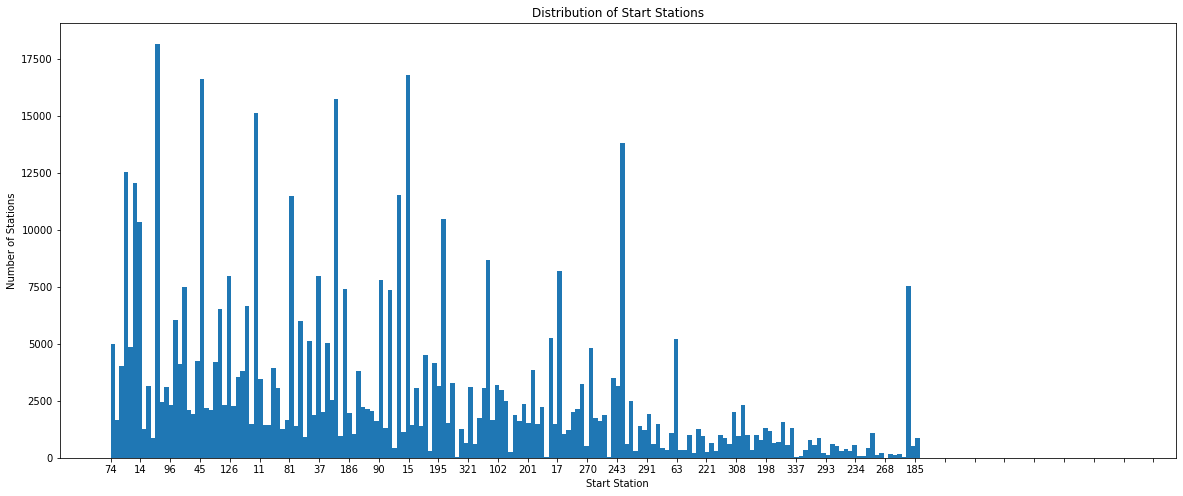

In [46]:
# Plotting start station id distribution on a standard scale
binsize = 1.5
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

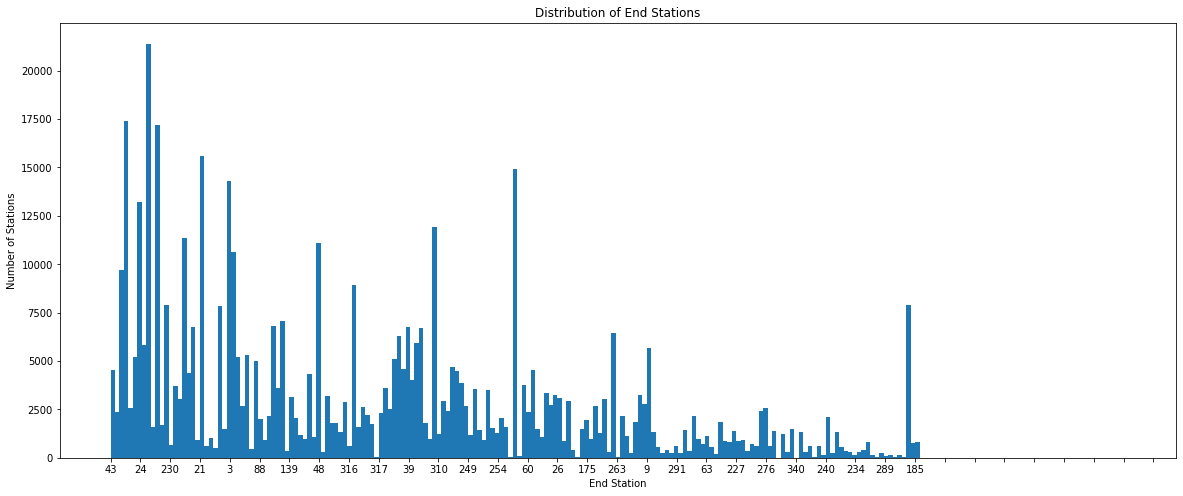

In [47]:
# Plotting end station id distribution.
binsize = 1.5
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

##### The start stations and end stations are almost same.

#### USER TYPE

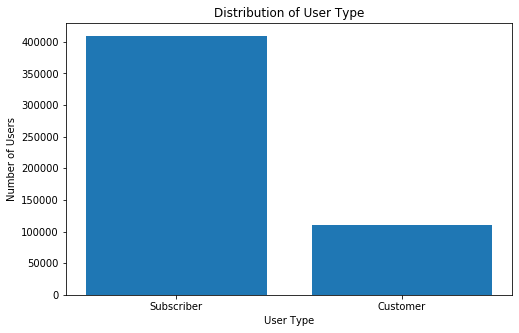

In [48]:
# plotting types of users 
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

##### Most of them are Subscribers

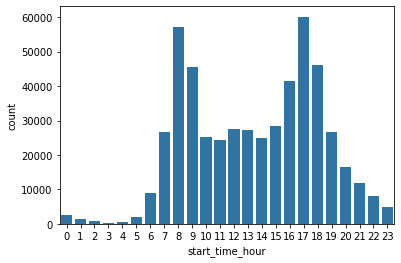

In [49]:
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_time_hour', color = default_color);

##### 8:00 AM and 5:00 PM are the two peak hours which have most bikers

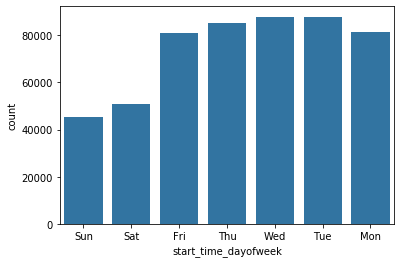

In [50]:
sb.countplot(data = df, x = 'start_time_dayofweek', color = default_color);

In [51]:
df['start_time_dayofweek'].describe()

count     519700
unique         7
top          Tue
freq       87865
Name: start_time_dayofweek, dtype: object

##### Tuesday has most bikers.

## Bivariate Exploration



#### Trip Duration by start and end station

Text(0.5, 1.0, 'Trip Duration by location')

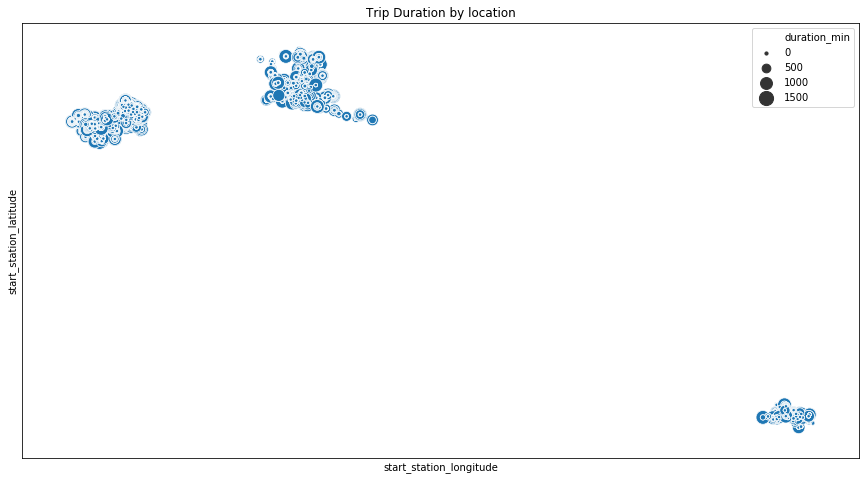

In [52]:
plt.figure(figsize=(15,8))
sb.scatterplot(x=df['start_station_longitude'],y=df['start_station_latitude'],size=df['duration_min'],sizes=(10,200),data=df)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title('Trip Duration by location')

Text(0.5, 1.0, 'Trip Duration by location')

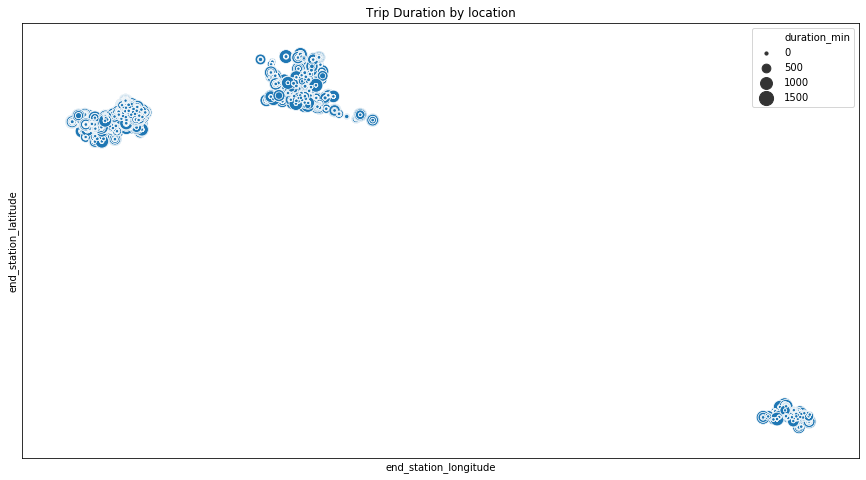

In [53]:
plt.figure(figsize=(15,8))
sb.scatterplot(x=df['end_station_longitude'],y=df['end_station_latitude'],size=df['duration_min'],sizes=(10,200),data=df)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title('Trip Duration by location')

Trip duration for some station for start station is higher and for some stations for end station is higher. as a result, we can see that what stations result in starting of longer trips and what stations comes end of longer trips.

#### Trip Distribution and User_type

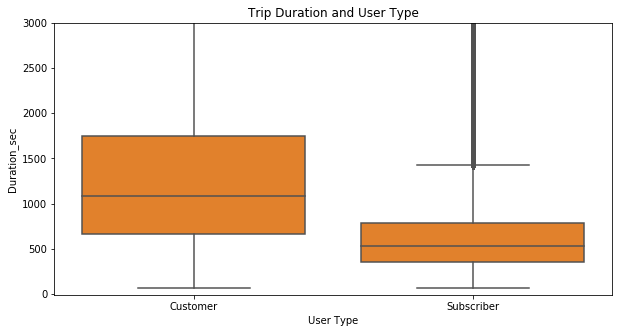

In [54]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

In [55]:
df['user_type'].describe()

count         519700
unique             2
top       Subscriber
freq          409230
Name: user_type, dtype: object

Higher percentage of customer rides longer trips then subscriber although number of subscriber riders are very high then customer.

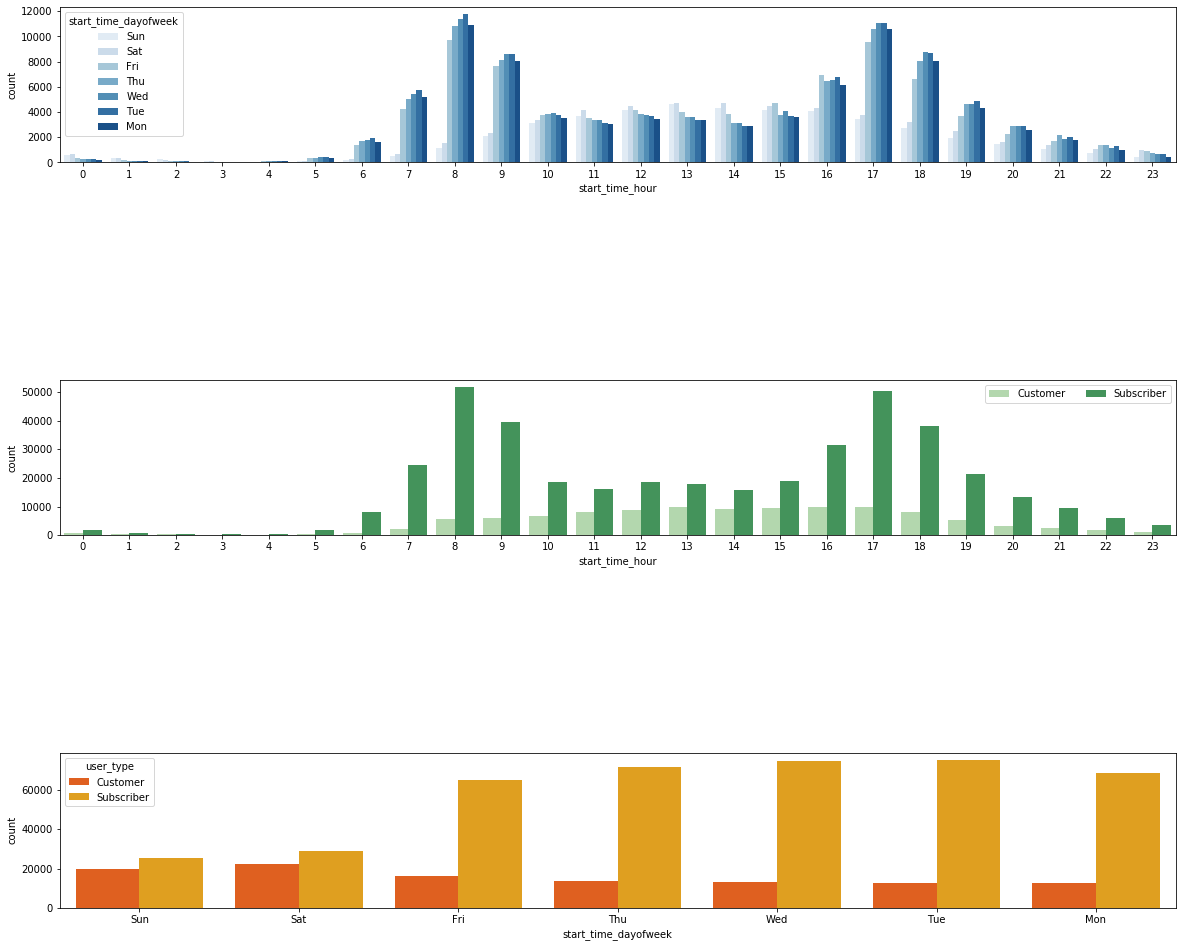

In [56]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');
ax = plt.subplot(6, 1, 3);
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); 
ax = plt.subplot(6, 1, 5);
sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

- Tuesday, 8 AM has the highest biker counts across 7 days, 24 hours.
- 8 AM has the most 'Subscriber' bikers compared to other hours.
- 1 PM has the most 'Customer' bikers compared to other hours.
- Tuesday has the most 'Subscriber' bikers compared to other days.
- Saturday has the most 'Customer' bikers compared to other days

## Multivariate Exploration

##### How does the average trip duration vary in weekdays between customers and subscribers?

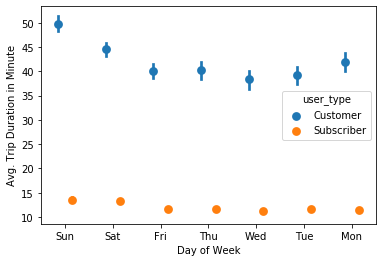

In [57]:
sb.pointplot(data=df, x='start_time_dayofweek', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

- It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week

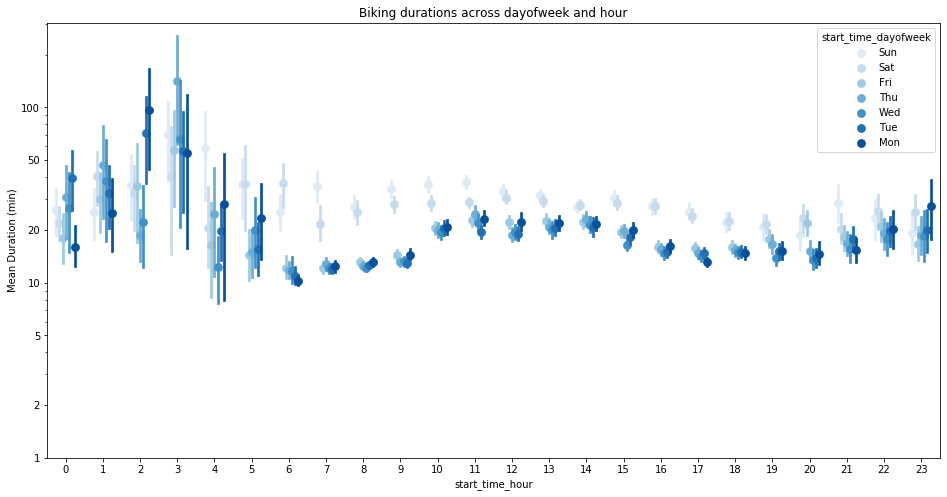

In [58]:
fig = plt.figure(figsize = [16,8])

ax = sb.pointplot(data = df, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

- Bikers on Tuesday and Monnday bike longer compared to bikers on other days

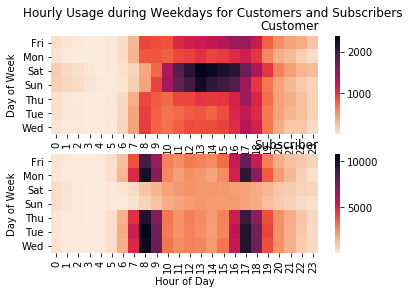

In [59]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2,1,1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_dayofweek', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_dayofweek', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2,1,2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_dayofweek', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_dayofweek', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

 - Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends

## FINDINGS
- Tuesday, 8 AM has the highest biker counts across 7 days, 24 hours.
- 8 AM has the most 'Subscriber' bikers compared to other hours.
- 1 PM has the most 'Customer' bikers compared to other hours.
- Tuesday has the most 'Subscriber' bikers compared to other days.
- Saturday has the most 'Customer' bikers compared to other days
- 8:00 AM and 5:00 PM are the two peak hours which have most bikers.
- subscribers ride much shorter/quicker trips compared to customers on each day of the week
- Tuesday has most bikers.
- Trip duration for some station for start station is higher and for some stations for end station is higher. as a result, we can see that what stations result in starting of longer trips and what stations comes end of longer trips.

In [60]:
# save cleaned data 
df.to_csv('clean_master_file.csv', index=False)